In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load data
ehact = pd.read_csv('ehact_2014.csv')
ehresp = pd.read_csv('ehresp_2014.csv')
ehwgts = pd.read_csv('ehwgts_2014.csv')

# Merge the data on 'tucaseid'
data = pd.merge(pd.merge(ehresp, ehact, on='tucaseid'), ehwgts, on='tucaseid')

# Select variables of interest5
# X = data[['erbmi', 'eudietsoda', 'eufastfd', 'eumeat', 'eumilk']]
X = data
y = data['eugenhth']

# Remove rows with missing data
X = X.dropna()
y = y[X.index]

# Fit the multiple linear regression model
model = LinearRegression().fit(X, y)

# Print the most correlated coefficients and their column names
coefs = model.coef_

print('Most correlated coefficients:')
coef_names = list(X.columns)
for coef, name in sorted(zip(coefs, coef_names), reverse=True)[:5]:
    print(name, round(coef, 10))

print('\nLess correlated coefficients:')
for coef, name in sorted(zip(coefs, coef_names))[:5]:
    print(name, round(coef, 10))


Most correlated coefficients:
eugenhth 1.0000000002
etwgt 9e-10
eumeat 7e-10
eeincome1 7e-10
euedur24 6e-10

Less correlated coefficients:
ethgt -3.8e-09
eudrink -3.7e-09
eusnap -2.4e-09
eusoda -1.5e-09
eugroshp -1.2e-09


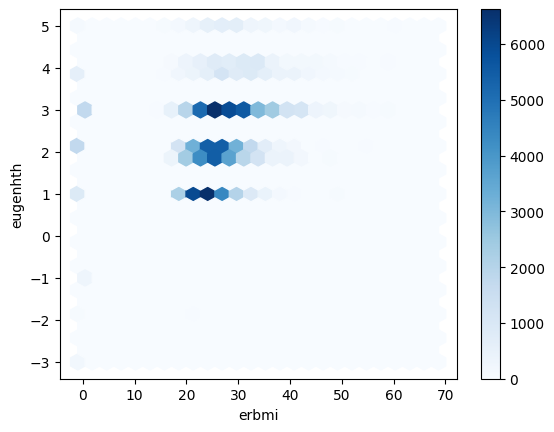

In [3]:
# Select variables of interest
X = data[['eugenhth', 'erbmi']]
X = X.dropna()

# Create a hexbin plot
plt.hexbin(X['erbmi'], X['eugenhth'], gridsize=25, cmap='Blues')
plt.xlabel('erbmi')
plt.ylabel('eugenhth')
plt.colorbar()
plt.show()


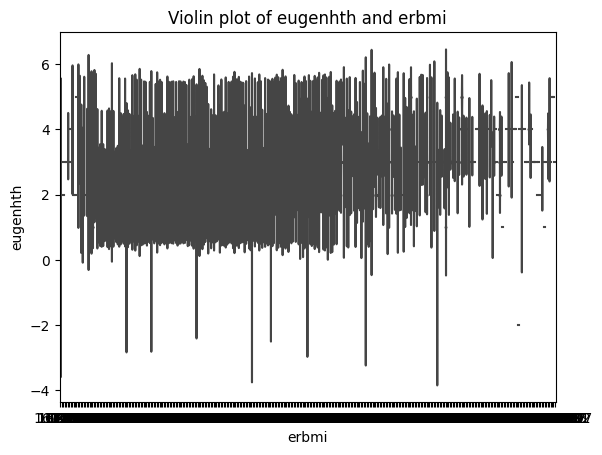

In [4]:
# Select variables of interest
X = data[['eugenhth', 'erbmi']]
X = X.dropna()

# Create a violin plot
sns.violinplot(x='erbmi', y='eugenhth', data=X, inner='stick')
plt.xlabel('erbmi')
plt.ylabel('eugenhth')
plt.title('Violin plot of eugenhth and erbmi')
plt.show()


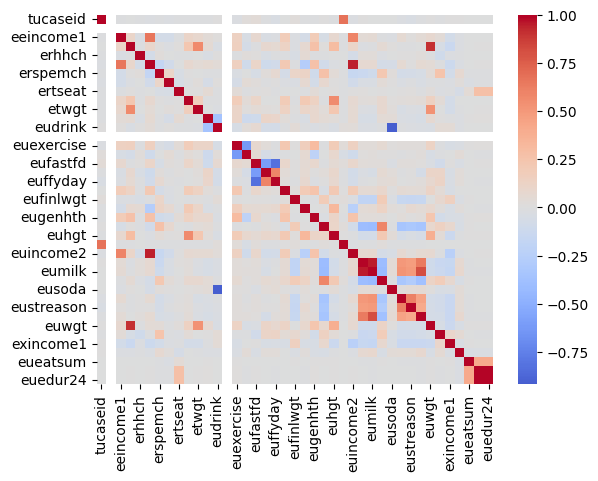

In [5]:
# Merge the data on 'tucaseid'
X = data[["tucaseid","tulineno","eeincome1","erbmi","erhhch","erincome","erspemch","ertpreat","ertseat","ethgt","etwgt","eudietsoda","eudrink","eueat","euexercise","euexfreq","eufastfd","eufastfdfrq","euffyday","eufdsit","eufinlwgt","eusnap","eugenhth","eugroshp","euhgt","euinclvl","euincome2","eumeat","eumilk","euprpmel","eusoda","eustores","eustreason","eutherm","euwgt","euwic","exincome1","tuactivity_n","eueatsum","euedur",
"euedur24"]]

# Compute correlation matrix
corr_matrix = X.corr()
# Plot correlation matrix as heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)

# Show plot
plt.show()